# Installing Packages and Prerequisite Dependencies

In [1]:
%pip install numpy
%pip install skimage
%pip install matplotlib
%pip install sklearn


  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
from setup import load_images, split as dataSplit;
import constants;
import numpy as np;

# Data Preparation for Classification - stonefly dataset

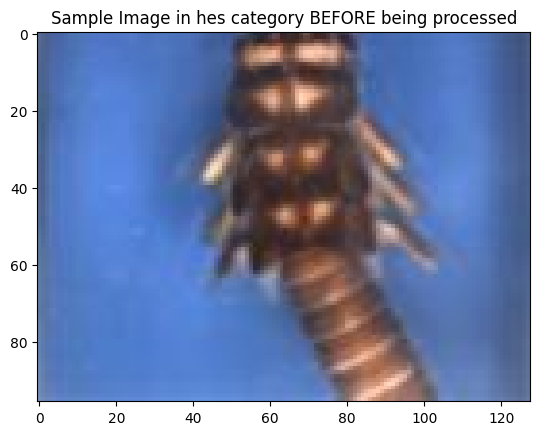

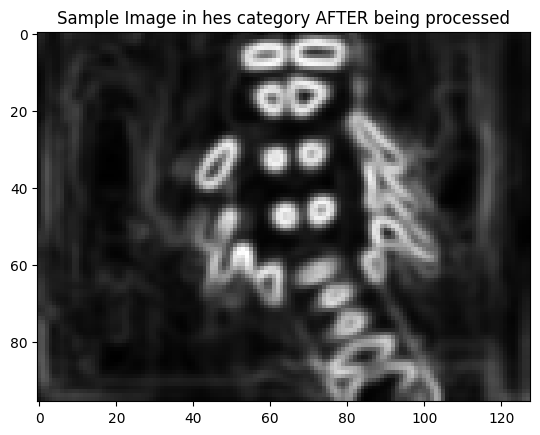

Total number of samples in the training set: 1089
Total number of labels in the training set: 1089
Unique labels in the training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the validation set: 273
Total number of labels in the validation set: 273
Unique labels in the validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [3]:
images, y = load_images(dataset=constants.STONEFLY, setName=constants.set0);
X_train, X_validation, y_train, y_validation = dataSplit(images, y);
# inspect the data
print(f"Total number of samples in the training set: {len(X_train)}");
print(f"Total number of labels in the training set: {len(y_train)}");
print(f"Unique labels in the training set: {np.unique(y_train)}");
print(f"Total number of samples in the validation set: {len(X_validation)}");
print(f"Total number of labels in the validation set: {len(y_validation)}");
print(f"Unique labels in the validation set: {np.unique(y_validation)}");

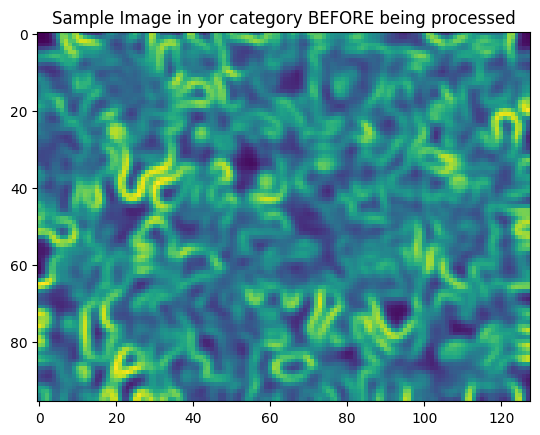

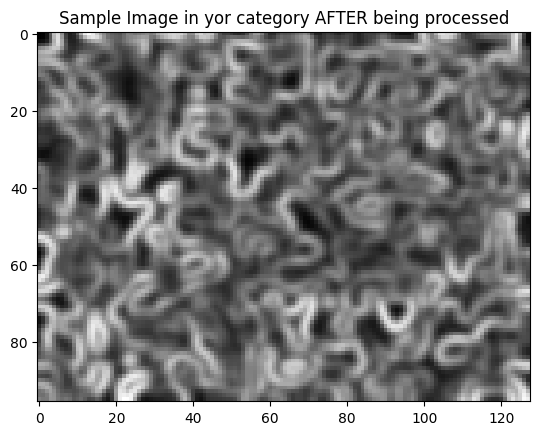

Total number of samples in the test set: 1480
Total number of labels in the test set: 1480
Unique labels in the test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [4]:
X_test, y_test = load_images(dataset=constants.STONEFLY, setName=constants.set1);
print(f"Total number of samples in the test set: {len(X_test)}");
print(f"Total number of labels in the test set: {len(y_test)}");
print(f"Unique labels in the test set: {np.unique(y_test)}");